# NLP on Handwritten Text

In [18]:
import numpy
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms

### Load data

In [6]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = datasets.MNIST('train', download=True, train=True, transform = transform)

testset = datasets.MNIST('test', download=True, train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

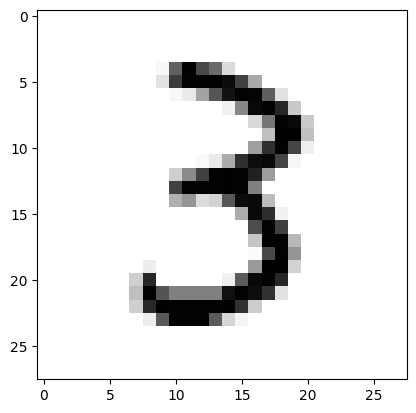

In [17]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
k = 10
plt.imshow(images[k].numpy().squeeze(), cmap='gray_r')
        

### Model Define

In [19]:
model = nn.Sequential(nn.Linear(784, 64),
                      nn.ReLU(),
                      nn.Linear(64, 64), 
                      nn.ReLU(),
                      nn.Linear(64, 10))

In [20]:
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
)


In [21]:
lossfunction = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

### Training

In [22]:
losses = []
for epoch in range(10):
    running_loss = 0
    for images, labels in train_loader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = lossfunction(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print("Epoch {} - Training Loss: {}".format(epoch, running_loss/len(train_loader)))
    losses.append(running_loss/len(train_loader))

Epoch 0 - Training Loss: 1.7651149106940736
Epoch 1 - Training Loss: 0.5886346127496345
Epoch 2 - Training Loss: 0.4143808326487348
Epoch 3 - Training Loss: 0.3549391434692752
Epoch 4 - Training Loss: 0.32193996893095056
Epoch 5 - Training Loss: 0.298918945583771
Epoch 6 - Training Loss: 0.28034727879837634
Epoch 7 - Training Loss: 0.2643223598456459
Epoch 8 - Training Loss: 0.2508069091418913
Epoch 9 - Training Loss: 0.23783749631886034


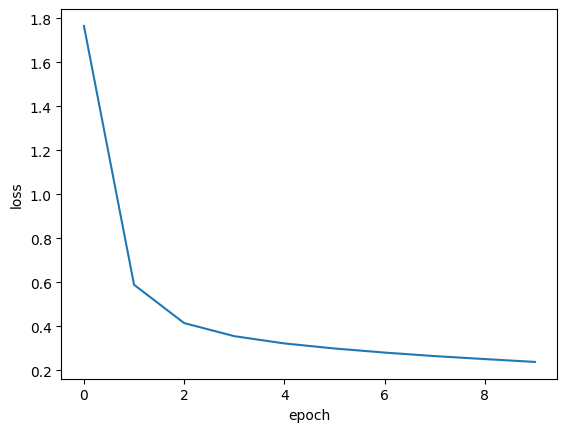

In [23]:
plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### Test

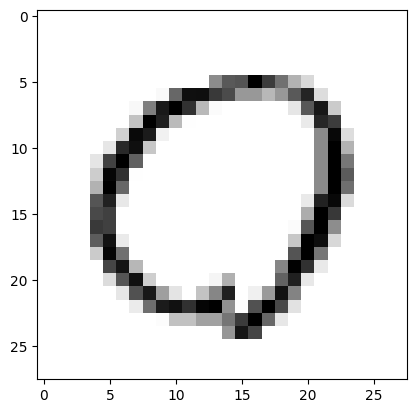

In [24]:
testimg, testlabels = next(iter(test_loader))
plt.imshow(testimg[0][0].numpy().squeeze(), cmap='gray_r')

In [25]:
img = testimg[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probabilities = list(ps.numpy()[0])
prediction = probabilities.index(max(probabilities))
print(prediction)

0
